 Dataset used - tuberculosis-chest-xrays-shenzhen (kaggle)
 https://www.kaggle.com/raddar/tuberculosis-chest-xrays-shenzhen
 

Library used - Fastai



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Found existing installation: torch 1.5.0
Uninstalling torch-1.5.0:
  Successfully uninstalled torch-1.5.0
Found existing installation: torchvision 0.6.0a0+82fd1c8
Uninstalling torchvision-0.6.0a0+82fd1c8:
  Successfully uninstalled torchvision-0.6.0a0+82fd1c8
     |████████████████████████████████| 753.4 MB 4.8 kB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 28.2 MB/s eta 0:00:01
ERROR: kornia 0.3.1 has requirement torch==1.5.0, but you'll have torch 1.4.0 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

np.random.seed(42)

In [2]:
path_img = '../input/tuberculosis-chest-xrays-shenzhen/images/images'

In [3]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('../input/tuberculosis-chest-xrays-shenzhen/images/images/CHNCXR_0512_1.png'),
 PosixPath('../input/tuberculosis-chest-xrays-shenzhen/images/images/CHNCXR_0304_0.png'),
 PosixPath('../input/tuberculosis-chest-xrays-shenzhen/images/images/CHNCXR_0332_1.png')]

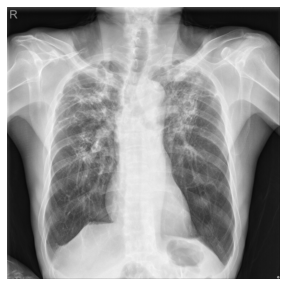

In [4]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [5]:
img_size = np.array(img.shape[1:])
img_size,img.data

(array([2990, 2993]),
 tensor([[[0.3922, 0.3569, 0.3294,  ..., 0.2980, 0.0000, 0.0000],
          [0.3882, 0.3412, 0.3176,  ..., 0.3020, 0.0000, 0.0000],
          [0.3725, 0.3765, 0.3216,  ..., 0.2824, 0.0000, 0.0000],
          ...,
          [0.7098, 0.6980, 0.6588,  ..., 0.1255, 0.0000, 0.0000],
          [0.6667, 0.7020, 0.6784,  ..., 0.1294, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.3922, 0.3569, 0.3294,  ..., 0.2980, 0.0000, 0.0000],
          [0.3882, 0.3412, 0.3176,  ..., 0.3020, 0.0000, 0.0000],
          [0.3725, 0.3765, 0.3216,  ..., 0.2824, 0.0000, 0.0000],
          ...,
          [0.7098, 0.6980, 0.6588,  ..., 0.1255, 0.0000, 0.0000],
          [0.6667, 0.7020, 0.6784,  ..., 0.1294, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.3922, 0.3569, 0.3294,  ..., 0.2980, 0.0000, 0.0000],
          [0.3882, 0.3412, 0.3176,  ..., 0.3020, 0.0000, 0.0000],
          [0.3725,

In [6]:
size = img_size//2
bs =2

In [7]:
path = '../input/tuberculosis-chest-xrays-shenzhen'

In [10]:
data = ImageDataBunch.from_csv(path, folder="/images/images", valid_pct=0.2, csv_labels='shenzhen_metadata.csv', fn_col = 0, 
                               label_col = 3 , ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/opt/conda/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
secondary PTB in the right upper field,mainly hyperplastic lesions, Right secondary PTB in the upper and middle fields, secondary PTB in the right upper field, Right PTB with fibrous changes, bilateral PTB, with left pleural effusion...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [11]:
data 

ImageDataBunch;

Train: LabelList (530 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: ../input/tuberculosis-chest-xrays-shenzhen;

Valid: LabelList (119 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,bilateral PTB,normal,normal
Path: ../input/tuberculosis-chest-xrays-shenzhen;

Test: None

In [18]:
len(data.train_ds), len(data.valid_ds)

(530, 119)

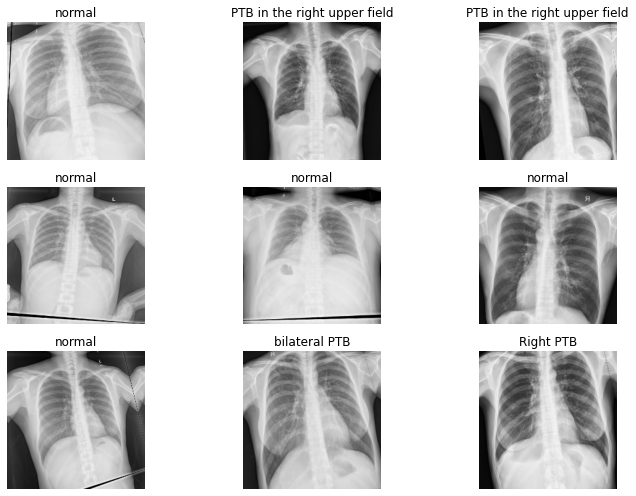

In [55]:
data.show_batch(3, figsize=(10,7))

In [16]:
data.classes

['1.bilateral secondary PTB  with right upper atelectasis;2.right pleural adhesions;3.left compensatory emphysema',
 '1.secondary PTB  in the right upper field; 2.small tuberculoma; 3.right pleural thickening and adhesions',
 'Bilateral secondary PTB',
 'Bilateral secondary PTB  with most lesions calcified',
 'Bilateral secondary PTB , right pleural change after decortication',
 'Bilateral secondary PTB, left encapsulated intrathoracic fluid',
 'Left PTB, left pleural thickening',
 'Left secondary PTB in the upper and middle fields, mainly  fibrous  lesions',
 'Old PTB in the right upper field',
 'PTB',
 'PTB  in the right upper field',
 'PTB in the bilateral upper field',
 'PTB in the bilateral upper fields',
 'PTB in the left lower field',
 'PTB in the left upper field',
 'PTB in the middle lower field',
 'PTB in the right lower field',
 'PTB in the right upper field',
 'PTB in the right upper field,COPD',
 'Right PTB',
 'Right pneumothorax, Right upper PTB, bilateral widespread infe

In [17]:
data.c

63

In [33]:
import pandas as pd
df=pd.read_csv('../input/tuberculosis-chest-xrays-shenzhen/shenzhen_metadata.csv' , sep=',',header=None)
len(df)

663

In [34]:
df.head()

,0,1,2,3
0,study_id,sex,age,findings
1,CHNCXR_0001_0.png,Male,45,normal
2,CHNCXR_0002_0.png,Male,63,normal
3,CHNCXR_0003_0.png,Female,48,normal
4,CHNCXR_0004_0.png,Male,58,normal


In [42]:
df[0]

0               study_id
1      CHNCXR_0001_0.png
2      CHNCXR_0002_0.png
3      CHNCXR_0003_0.png
4      CHNCXR_0004_0.png
             ...        
658    CHNCXR_0658_1.png
659    CHNCXR_0659_1.png
660    CHNCXR_0660_1.png
661    CHNCXR_0661_1.png
662    CHNCXR_0662_1.png
Name: 0, Length: 663, dtype: object

(array([  1.,   0., 460.,   0., 202.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

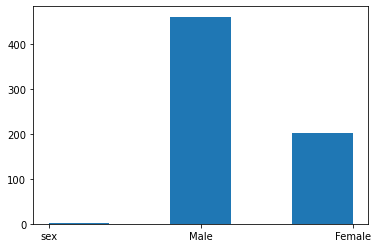

In [48]:
# sex  
plt.hist(df[1], bins=5)

(array([163., 260., 152.,  56.,  32.]),
 array([ 0. , 15.2, 30.4, 45.6, 60.8, 76. ]),
 <a list of 5 Patch objects>)

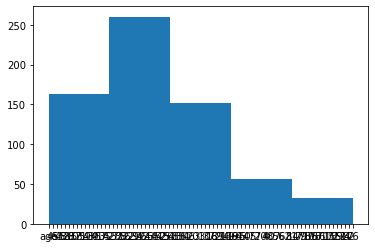

In [49]:
# age
plt.hist(df[2], bins=5)

(array([490.,  96.,  40.,  21.,  16.]),
 array([ 0., 15., 30., 45., 60., 75.]),
 <a list of 5 Patch objects>)

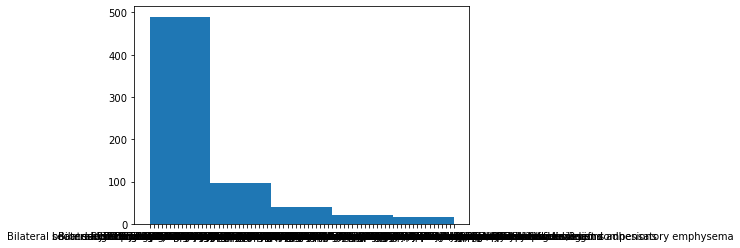

In [50]:
# classes
plt.hist(df[3], bins=5)